In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2025-07-05 11:32:06.328064: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/shashankgoutam/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
#Load Dataset
df = pd.read_csv("HR_comma_sep.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


/var/folders/98/k_m6kcxn1vdcwfflj04d6l1r0000gp/T/ipykernel_18162/177023377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='Set2')


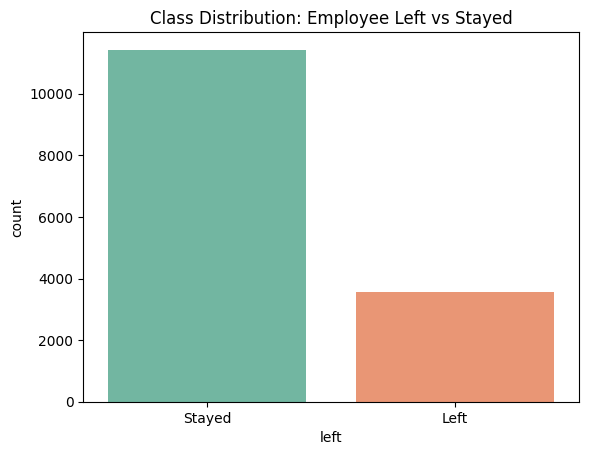

In [4]:
#Class Distribution
sns.countplot(x='left', data=df, palette='Set2')
plt.title("Class Distribution: Employee Left vs Stayed")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

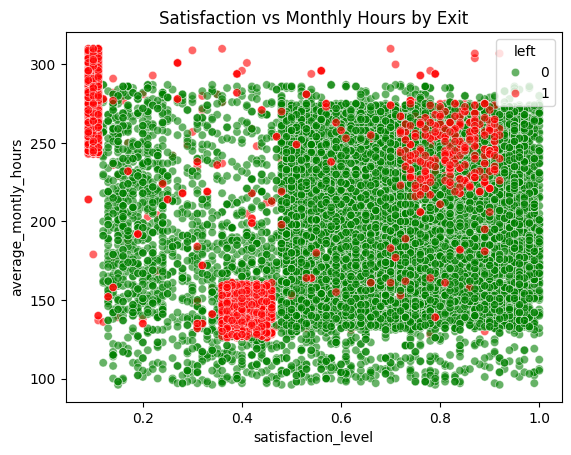

In [5]:
sns.scatterplot(data=df, x="satisfaction_level", y="average_montly_hours", hue="left",
                palette={0: "green", 1: "red"}, alpha=0.6)
plt.title("Satisfaction vs Monthly Hours by Exit")
plt.show()

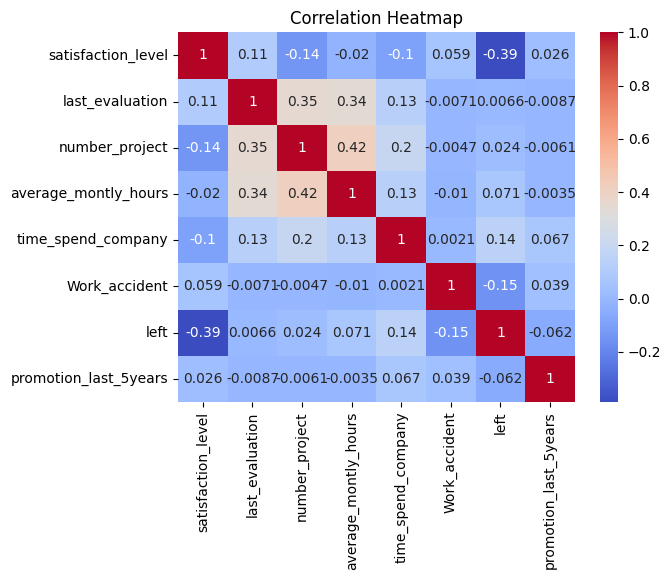

In [6]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)

In [8]:
X = df_encoded.drop("left", axis=1)
y = df_encoded["left"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_log))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.62      0.64      3000
weighted avg       0.76      0.78      0.76      3000



In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree:\n", classification_report(y_test, y_pred_tree))


Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [12]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2294
           1       0.98      0.08      0.16       706

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.83      0.78      0.71      3000



In [13]:
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

/Users/shashankgoutam/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3993 - loss: 3.7150 - val_accuracy: 0.7647 - val_loss: 0.6392
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7613 - loss: 0.6301 - val_accuracy: 0.7647 - val_loss: 0.6017
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7594 - loss: 0.5969 - val_accuracy: 0.7647 - val_loss: 0.5758
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7622 - loss: 0.5730 - val_accuracy: 0.7647 - val_loss: 0.5604
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7621 - loss: 0.5601 - val_accuracy: 0.7647 - val_loss: 0.5524
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7613 - loss: 0.5543 - val_accuracy: 0.7647 - val_loss: 0.5484
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7624 - loss: 0.5503 - val_accuracy: 0.7647 - val_loss: 0.5467
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7627 - loss: 0.5487 - val_accuracy: 0.

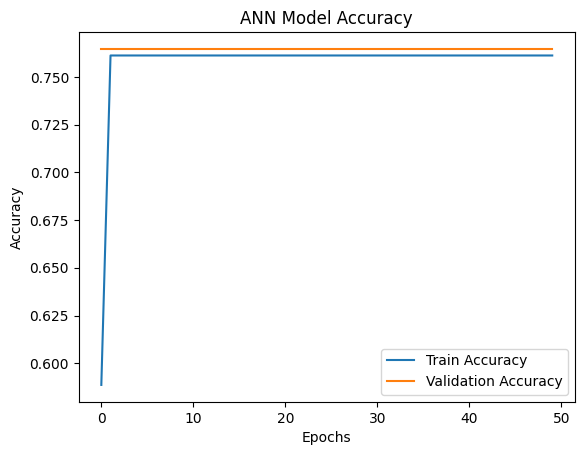

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()